[학습목표]
- 500명의 키와 몸무게, 비만도 라벨을 이용하여 비만을 판단하는 모델을 생성하기
- 머신러닝 전체 과정의 흐름을 이해하기

###  문제정의
- 머신러닝을 통해서 어떤 문제를 해결할 것인가?
- 지도학습 vs 비지도학습 vs 강화학습
- 지도학습 : 분류 vs 회귀
#### 정의완료
- 비만을 판단하는 모델을 만들자 -> 지도학습 - 분류

### 데이터 수집
- csv 파일로 이루어진 데이터 수집
- 500명의 성별, 키, 몸무게, 비만도 등급

In [1]:
# 데이터 꺼내오기
import pandas as pd


In [2]:
data = pd.read_csv('./data/bmi_500.csv')
data

,Gender,Height,Weight,Label
0,Male,174,96,Obesity
1,Male,189,87,Normal
2,Female,185,110,Obesity
3,Female,195,104,Overweight
4,Male,149,61,Overweight
...,...,...,...,...
495,Female,150,153,Extreme Obesity
496,Female,184,121,Obesity
497,Female,141,136,Extreme Obesity
498,Male,150,95,Extreme Obesity


### 데이터 전처리
- 1. 결측치 처리 : 비어있는 데이터를 채워주기
- 2. 이상치 처리 : 정상적인 범위를 벗어난 데이터 수정하기

#### 결측치 확인
- 데이터프레임의 형태를 갖춘 후, info() 함수 사용

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
 3   Label   500 non-null    object
dtypes: int64(2), object(2)
memory usage: 15.8+ KB


#### 이상치 확인
- 데이터프레임의 형태를 갖춘 후, describe() 함수 사용
- describe() : 수치형 데이터만 분석가능, 기술통계

In [4]:
data.describe()
# count : 데이터 수
# mean : 평균값
# std : 표준편차
# min : 최소값
# 25% : 1분위수
# 50% : 중앙값(중위수)
# 75% : 3분위수
# max : 최대값

# 이상치확인
# 1. min, max 확인하기 - 이상없음
# 2. 평균(mean), 중앙값(50%) 확인하기 ==> 두 수치가 비슷한지 확인 - 이상없음
# 3. 위의 두 수치가 비슷하지 않을경우 : min ~ max 까지 5개의 간격을 확인하기
#     => 각 구간의 데이터가 고르게 분포가 되어있는지 확인

# 결측치, 이상치 문제없음

,Height,Weight
count,500.000000,500.000000
mean,169.944000,106.000000
std,16.375261,32.382607
min,140.000000,50.000000
25%,156.000000,80.000000
50%,170.500000,106.000000
75%,184.000000,136.000000
max,199.000000,160.000000


### 탐색적 데이터 분석(EDA)
- 데이터를 자세하게 살펴보자
- 비만도별로 데이터가 잘 나뉘어져있는지 확인

#### 비만도 등급 확인

In [5]:
# 중복된 값은 제거 - unique()
data['Label'].unique()
# 'Obesity' 비만
# 'Normal'  정상
# 'Overweight' 과체중
# 'Extreme Obesity' 고도비만
# 'Weak'       저체중
# 'Extremely Weak' 극심한 저체중

# 총 6개의 등급으로 나뉘어져있음

array(['Obesity', 'Normal', 'Overweight', 'Extreme Obesity', 'Weak',
       'Extremely Weak'], dtype=object)

#### Label이 Weak인 사람들만 추려보기

In [6]:
# 불리언 인덱싱
# data[data['Label'] == 'Weak']


bol = data['Label'] == 'Weak' # 불리언 인덱싱한 결과를 사용하기 위해 변수에 저장
label = data.loc[bol] # 라벨이 Weak인 전체 행에대한 데이터를 가져옴
label


,Gender,Height,Weight,Label
27,Male,187,62,Weak
31,Male,178,52,Weak
32,Female,195,65,Weak
51,Female,176,54,Weak
98,Male,195,69,Weak
200,Male,184,57,Weak
242,Male,191,62,Weak
269,Male,168,50,Weak
279,Male,188,57,Weak
280,Male,193,65,Weak


####  Weak인 사람들을 그래프로 그려보기
- 산점도

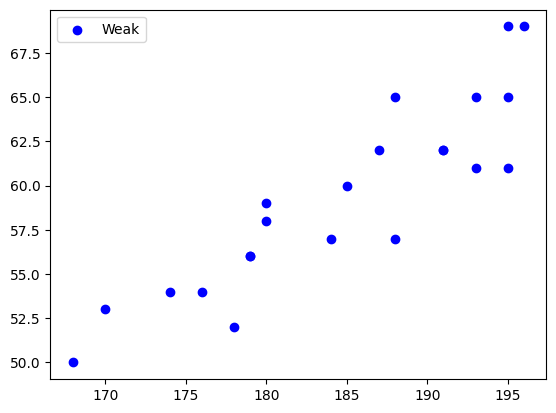

In [7]:
# 그래프 그려주는 도구 꺼내오기
import matplotlib.pyplot as plt

# plt.scatter(x, y) # X 축 : 키 , Y축 : 몸무게

x = label['Height']
y= label['Weight']

plt.scatter(x,y, color='blue', label='Weak')
plt.legend() # 그래프에 범례(label) 표시
plt.show()

#### OverWeight 그래프 그리기

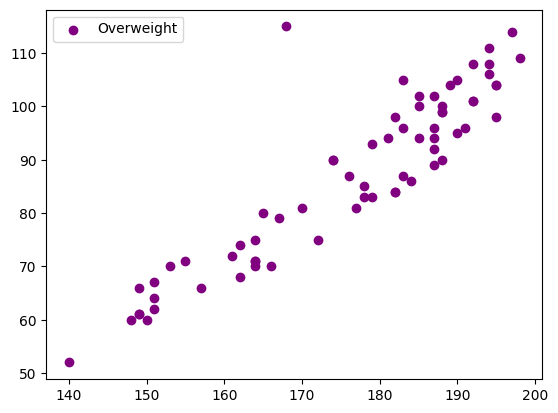

In [8]:
overData =data['Label'] == 'Overweight'
over = data.loc[overData]

overX = over['Height']
overY = over['Weight']
plt.scatter(overX,overY, color='purple', label='Overweight')
plt.legend()
plt.show()

#### 함수로 만들어서 그래프 그리기
- 반복되는 부분을 함수로 간략화

In [9]:
def myScatter(label, color):
    bol = data['Label'] == label
    result = data.loc[bol]
    
    plt.scatter(result['Height'], result['Weight'], color = color, label = label)

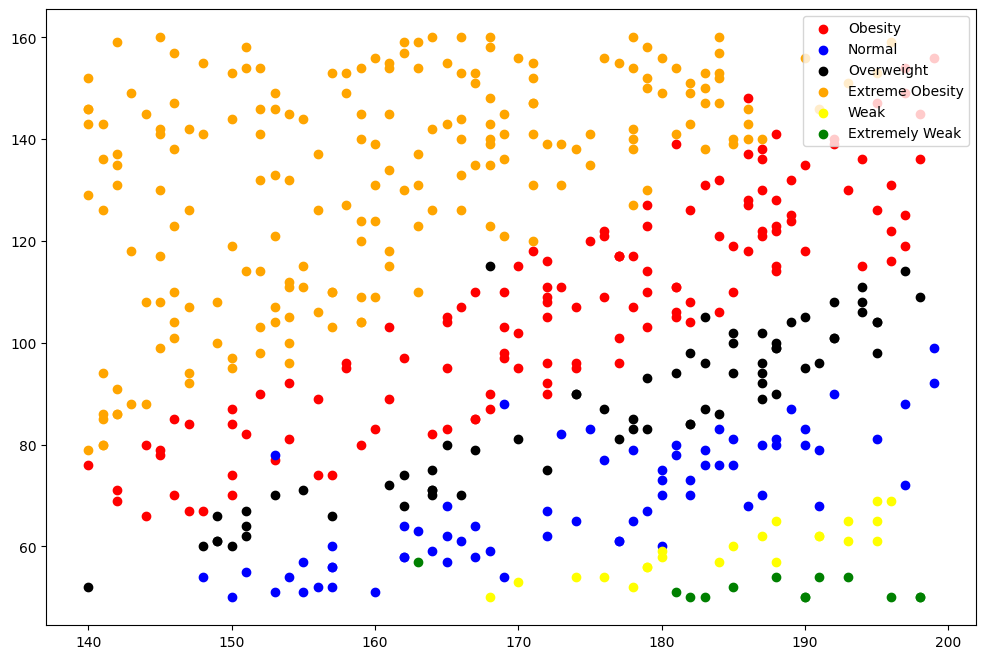

In [10]:
plt.figure(figsize=(12,8)) # 그래프 사이즈 지정
myScatter('Obesity', 'red')
myScatter('Normal','blue')
myScatter('Overweight','black')
myScatter('Extreme Obesity','orange')
myScatter('Weak', 'yellow')
myScatter('Extremely Weak', 'green')
plt.legend()
plt.show()

In [11]:
data[data['Label'] == 'Normal']
h_153 = data[data['Height'] == 153]
h_153
# 231 Female 153 78 Normal => Obesity

,Gender,Height,Weight,Label
15,Female,153,107,Extreme Obesity
21,Female,153,149,Extreme Obesity
30,Male,153,121,Extreme Obesity
70,Female,153,51,Normal
212,Female,153,146,Extreme Obesity
231,Female,153,78,Normal
250,Male,153,70,Overweight
322,Male,153,104,Extreme Obesity
428,Female,153,77,Obesity
436,Female,153,133,Extreme Obesity


In [12]:
# 키가 153이고 몸무게가 78kg인 여성을 Normal로 잘못 표기된 것을 Obesity로 수정
data.loc[231, 'Label'] = 'Obesity'

In [13]:
data.loc[[231]]

,Gender,Height,Weight,Label
231,Female,153,78,Obesity


### 모델 선택 및 하이퍼파라미터 튜닝
- 머신러닝의 모델 불러와서 사용하는 단계

#### 모델 불러오기
- KNN 모델

In [30]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=4) # 기본값

#### 문제데이터와 정답데이터로 분리

In [15]:
# 문제 : Height, Weight 
X = data.loc[:,'Height':'Weight']
# 정답 : Label
y = data['Label']
display(X)
display(y)

,Height,Weight
0,174,96
1,189,87
2,185,110
3,195,104
4,149,61
...,...,...
495,150,153
496,184,121
497,141,136
498,150,95


0              Obesity
1               Normal
2              Obesity
3           Overweight
4           Overweight
            ...       
495    Extreme Obesity
496            Obesity
497    Extreme Obesity
498    Extreme Obesity
499    Extreme Obesity
Name: Label, Length: 500, dtype: object

#### 학습을 위해 훈련용(train)과 평가용(test)로 분리
- 훈련 : 평가 = 7 : 3

In [16]:
X_train = X[:350] # 0 ~ 349 훈련용 문제
X_test = X[350:]  # 350 ~ 500 평가용 문제
y_train = y[:350] # 0 ~ 349 훈련용 정답
y_test = y[350:]  # 350 ~ 500 평가용 정답
print('훈련용 문제 :', X_train.shape)
print('평가용 문제 : ', X_test.shape)
print('훈련용 정답 : ', y_train.shape)
print('평가용 정답 : ', y_test.shape)

훈련용 문제 : (350, 2)
평가용 문제 :  (150, 2)
훈련용 정답 :  (350,)
평가용 정답 :  (150,)


### 학습

In [31]:
# 학습시키는 함수 fit(문제, 정답)
knn_model.fit(X_train, y_train)
# X 데이터(키, 몸무게)
# y 데이터(비만도 등급)
# X 데이터를 통해서 y 데이터의 규칙을 찾음

KNeighborsClassifier(n_neighbors=4)

### 평가
- 모델이 제대로 만들어졌는지 평가
- 새로운 데이터(평가용으로 분리한 데이터)에 대해서 잘 예측 하는지 확인

#### 머신러닝 학습을 할때 자주뜨는 warning 무시하기

In [18]:
import warnings
warnings.filterwarnings('ignore') # warning 무시하기

In [19]:
# 예측
knn_model.predict([[187, 80]])

array(['Normal'], dtype=object)

#### 평가
- 학습에 대한 평가 함수 score()

In [32]:
# 만들어진 모델 평가 -> 학습에 사용하지 않은 새로운 문제와 정답을 비교
# score(문제데이터, 정답데이터)
knn_model.score(X_test, y_test)

# 정답데이터와 예측정답을 비교
# 0 ~ 1 까지 값을 출력
# 0에 가깝다면 : 모델의 성능이 낮다, 규칙이 엉망이다 -> 규칙을 찾지 못함
# 1에 가깝다면 : 모델의 성능이 괜찮다, 규칙을 잘 찾음

# 0.9 : 10개의 문제중에서 9개를 맞춤

0.8933333333333333

In [33]:
# 훈련용 데이터의 정확도
knn_model.score(X_train, y_train)

# 규칙을 찾는데 사용된 데이터이기 때문에 test보다는 score 값이 높음

0.9542857142857143

### 하이퍼 파라미터 튜닝하기
- KNN 모델의 하이퍼 파라미터(n_neighbors) 변화에 따라 score값을 확인
- -> 최적의 하이퍼 파라미터를 찾기 위해

In [37]:
#모델 만들기
knn_model2 = KNeighborsClassifier(n_neighbors=3)
knn_model2.fit(X_train,y_train)
knn_model2.score(X_test, y_test)

0.9

In [45]:
for i in range(1,11):
    knn_model3 = KNeighborsClassifier(n_neighbors=i)
    knn_model3.fit(X_train,y_train)
    print(f"{i}번째 score : {knn_model3.score(X_test, y_test)}")    

1번째 score : 0.9066666666666666
2번째 score : 0.9066666666666666
3번째 score : 0.9
4번째 score : 0.8933333333333333
5번째 score : 0.9066666666666666
6번째 score : 0.9133333333333333
7번째 score : 0.9
8번째 score : 0.9133333333333333
9번째 score : 0.9133333333333333
10번째 score : 0.94


#### 모델 복잡도 곡선 그려보기
- 과대적합 과소적합, 일반화 확인하기

In [46]:
# 훈련용과 평가용 데이터의 점수를 저장 -> list 생성
# 훈련용 데이터 점수
train_score = []

# 평가용 데이터 점수
test_score = []

# n_neighbors : 1 ~ 30까지 반복
for i in range(1,31):
    # n_neighbors를 변경해가면서 모델 생성
    knn_model4 = KNeighborsClassifier(n_neighbors=i)
    
    #생성된 모델 학습
    knn_model4.fit(X_train,y_train)
    
    # 학습된 모델의 score값을 출력해 list에 저장하기
    train_score.append(knn_model4.score(X_train, y_train))
    test_score.append(knn_model4.score(X_test, y_test))

In [47]:
train_score

[1.0,
 0.9485714285714286,
 0.9371428571428572,
 0.9542857142857143,
 0.9285714285714286,
 0.9142857142857143,
 0.9057142857142857,
 0.9142857142857143,
 0.9085714285714286,
 0.9114285714285715,
 0.9114285714285715,
 0.9142857142857143,
 0.9142857142857143,
 0.9028571428571428,
 0.8971428571428571,
 0.9,
 0.9057142857142857,
 0.8828571428571429,
 0.8914285714285715,
 0.8771428571428571,
 0.8714285714285714,
 0.8514285714285714,
 0.86,
 0.8542857142857143,
 0.8571428571428571,
 0.8485714285714285,
 0.8542857142857143,
 0.8428571428571429,
 0.8342857142857143,
 0.8257142857142857]

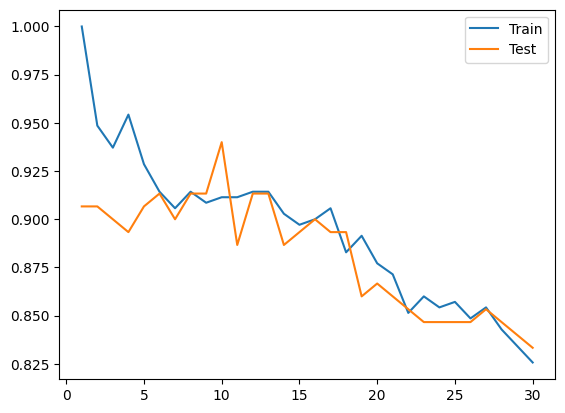

In [48]:
# 그래프로 확인하기
# 선 그래프 : plot(x, y)
# X축(학습량) : n_neighbors = range(1,31)
# Y축(정확도) : socre 값

plt.plot(range(1,31),train_score, label='Train')
plt.plot(range(1,31),test_score, label='Test')
plt.legend()
plt.show()